In [2]:
import sys
import time
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree,svm
import numpy as np
import joblib
import pydotplus
from IPython.display import Image, display
sys.path.append('data/')
sys.path.append('data/source/')
sys.path.append('data/model/deep_learning_model')
sys.path.append('data/model/knowledge_model')
from read_PLAID_data import read_processed_data,read_index,get_feature_name

In [2]:
start_reading_time=time.time()

load_transformer = {'I': 0, 'R': 1, 'NL': 0}
x_load_train, y_load_train = read_processed_data('load',
                           direaction=1,
                           offset=10,
                           each_lenth=10,
                           Transformer=load_transformer,
                           source='submetered_process/training')
x_load_train=x_load_train[:,1:] 
x_load_validation, y_load_validation = read_processed_data('load',
                           direaction=1,
                           offset=10,
                           each_lenth=10,
                           Transformer=load_transformer,
                           source='submetered_process/validation')
x_load_validation=x_load_validation[:,1:]
x_load_trainval=np.concatenate((x_load_train,x_load_validation),axis=0)
y_load_trainval=np.concatenate((y_load_train,y_load_validation),axis=0) 
x_load_test, y_load_test = read_processed_data('load',
                           direaction=1,
                           offset=10,
                           each_lenth=10,
                           Transformer=load_transformer,
                           source='submetered_process/testing')
x_load_test=x_load_test[:,1:] 

print('finished loading data, cost %.3fs'%(time.time()-start_reading_time))                        

finished loading data, cost 19.330s


Best score on validation set:0.93941
Best parameters:{'max_depth': 3, 'min_samples_split': 1500}
Best score on test set:0.91794


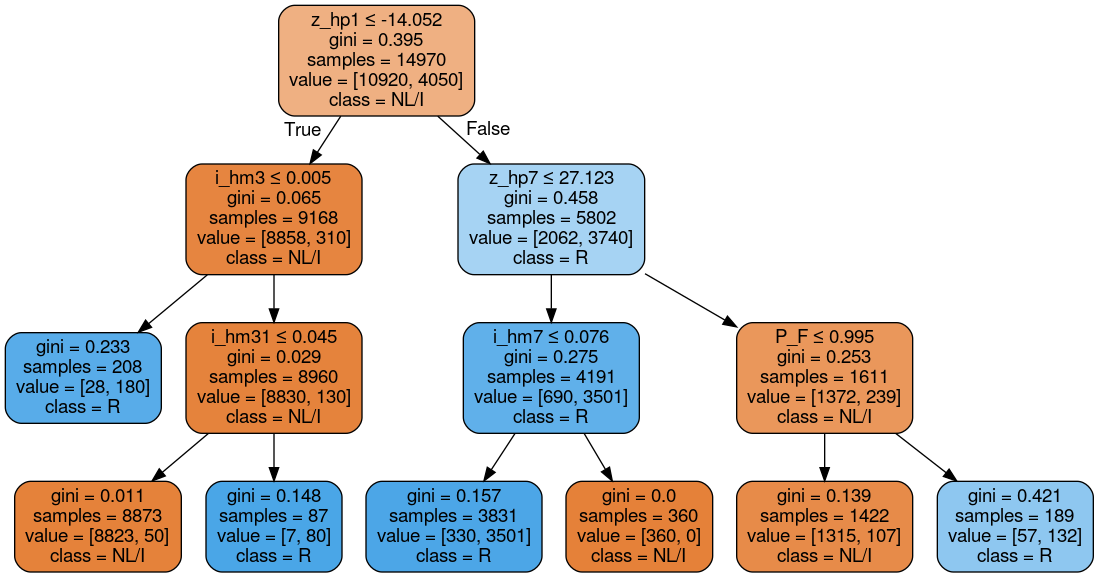

Best score on validation set:0.93616
Best parameters:{'C': 15}
Best score on test set:0.96596
NL:955
I:413
R:508


In [3]:
best_score=0.0
for md in [1,2,3,4,5,6,7,8,9,10]:
    for mss in [100,150,200,250,500,1000,1500,2000]:
        load_tree=tree.DecisionTreeClassifier(max_depth=md,min_samples_split=mss)
        load_tree.fit(x_load_train,y_load_train)
        score=load_tree.score(x_load_validation,y_load_validation)
        if score>best_score:
            best_score=score
            best_parameters={'max_depth':md,'min_samples_split':mss}

load_tree=tree.DecisionTreeClassifier(**best_parameters)
load_tree.fit(x_load_trainval,y_load_trainval)
test_score=load_tree.score(x_load_test,y_load_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

feature_name = get_feature_name()
del feature_name[0]

dot_data = tree.export_graphviz(load_tree,
                                feature_names=feature_name,
                                class_names=['NL/I','R'],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

best_score=0.0
for c in [0.001,0.01,0.1,0.51,2,5,10,15,25,50,100,150,200,300,350,400,450,500,1000,10000]:
    load_svm=svm.SVC(C=c)
    load_svm.fit(x_load_train,y_load_train)
    score=load_svm.score(x_load_validation,y_load_validation)
    if score>best_score:
        best_score=score
        best_parameters={'C':c}

load_svm=svm.SVC(**best_parameters)
load_svm.fit(x_load_trainval,y_load_trainval)
test_score=load_svm.score(x_load_test,y_load_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

ri=read_index('load')
for key in ri:
    print('{}:{}'.format(key,len(ri[key])))

In [4]:
start_reading_time=time.time()

lighter_transformer = {'0': 0, '1': 1}
x_light_train, y_light_train = read_processed_data('is_light',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=lighter_transformer,
                           source='submetered_process/training')
x_light_train=x_light_train[:,1:] 
x_light_validation, y_light_validation = read_processed_data('is_light',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=lighter_transformer,
                           source='submetered_process/validation')
x_light_validation=x_light_validation[:,1:]
x_light_trainval=np.concatenate((x_light_train,x_light_validation),axis=0)
y_light_trainval=np.concatenate((y_light_train,y_light_validation),axis=0) 
x_light_test, y_light_test = read_processed_data('is_light',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=lighter_transformer,
                           source='submetered_process/testing')
x_light_test=x_light_test[:,1:] 

print('finished loading data, cost %.3fs'%(time.time()-start_reading_time))   

finished loading data, cost 19.254s


Best score on validation set:0.99642
Best parameters:{'max_depth': 8, 'min_samples_split': 100}
Best score on test set:0.87546


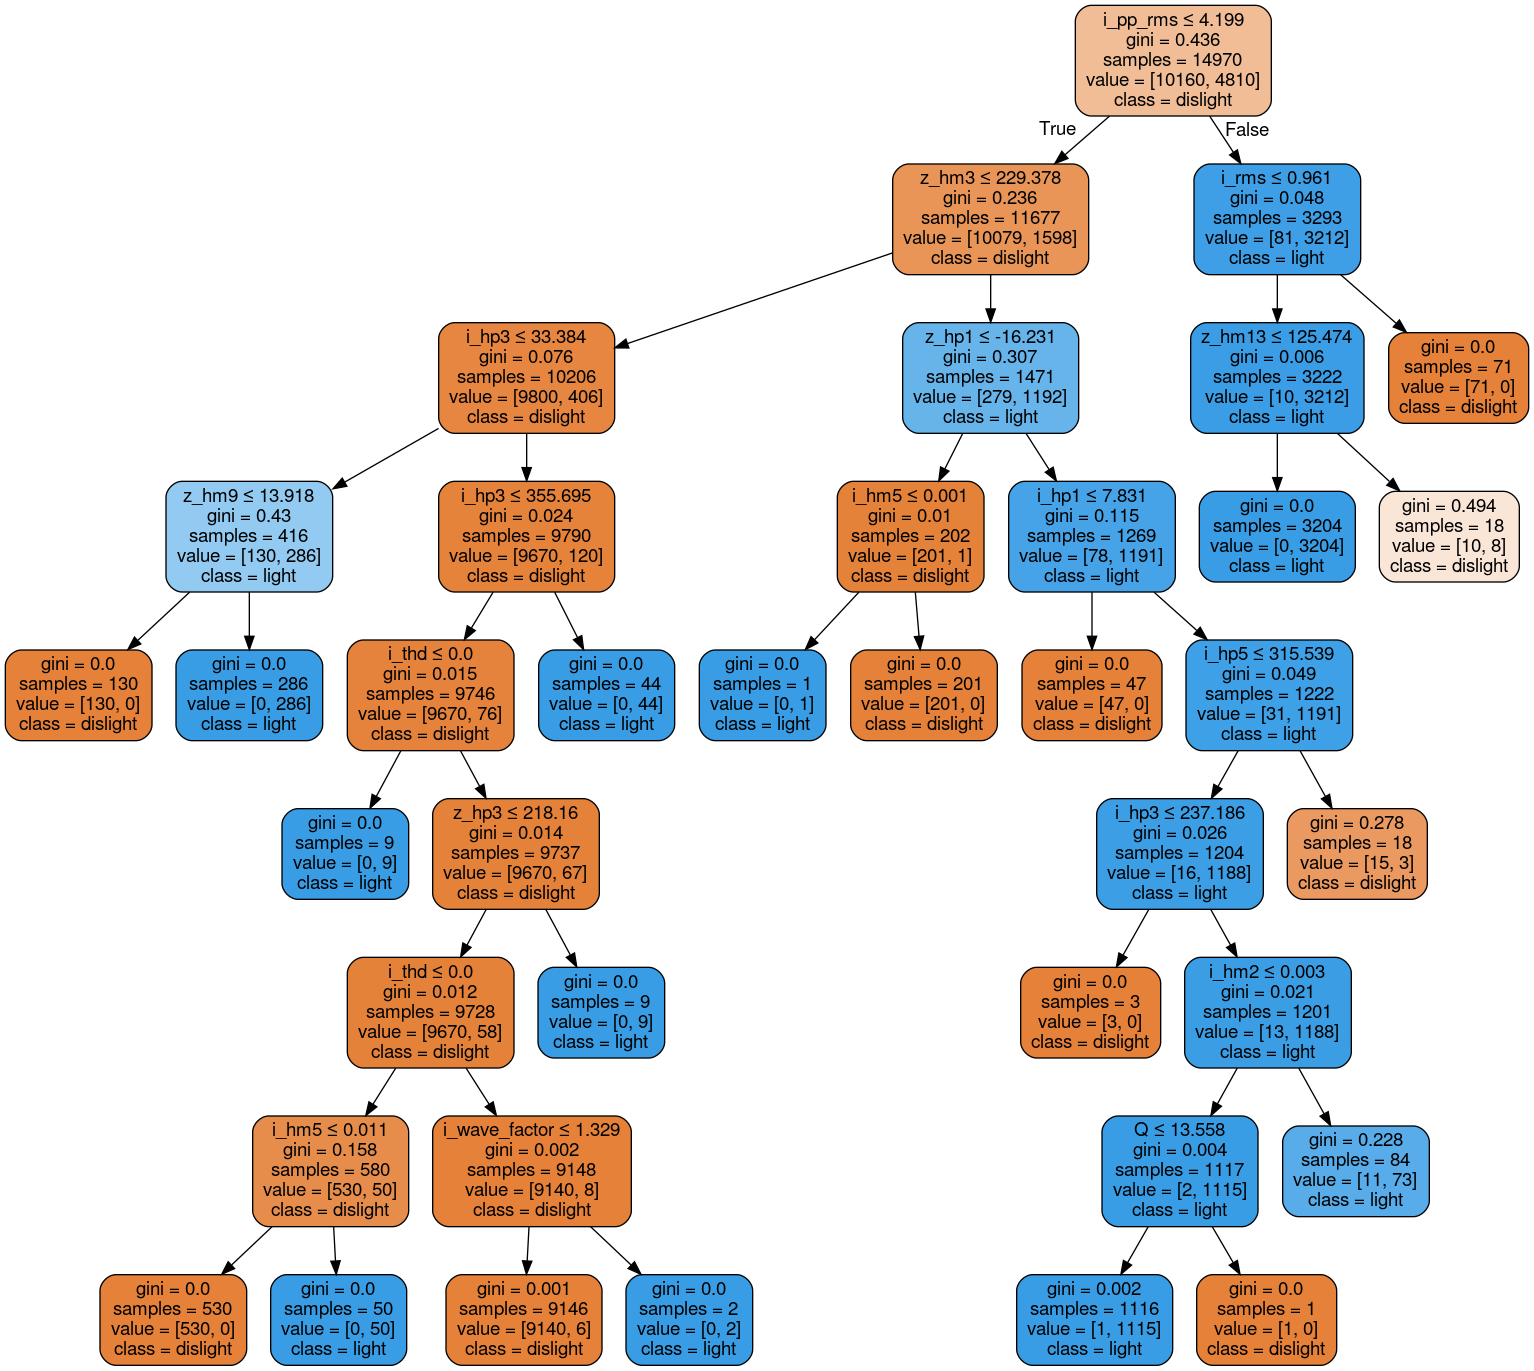

Best score on validation set:0.90489
Best parameters:{'C': 15}
Best score on test set:0.91187
1:603
0:1273


In [5]:
best_score=0.0
for md in [1,2,3,4,5,6,7,8,9,10]:
    for mss in [100,150,200,250,500,1000,1500,2000]:
        lighter_tree=tree.DecisionTreeClassifier(max_depth=md,min_samples_split=mss)
        lighter_tree.fit(x_light_train,y_light_train)
        score=lighter_tree.score(x_light_validation,y_light_validation)
        if score>best_score:
            best_score=score
            best_parameters={'max_depth':md,'min_samples_split':mss}

lighter_tree=tree.DecisionTreeClassifier(**best_parameters)
lighter_tree.fit(x_light_trainval,y_light_trainval)
test_score=lighter_tree.score(x_light_test,y_light_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

feature_name = get_feature_name()
del feature_name[0]

dot_data = tree.export_graphviz(lighter_tree,
                                feature_names=feature_name,
                                class_names=['dislight','light'],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

best_score=0.0
for c in [0.001,0.01,0.1,0.51,2,5,10,15,25,50,100,150,200,300,350,400,450,500,1000,10000]:
    lighter_svm=svm.SVC(C=c)
    lighter_svm.fit(x_light_train,y_light_train)
    score=lighter_svm.score(x_light_validation,y_light_validation)
    if score>best_score:
        best_score=score
        best_parameters={'C':c}

lighter_svm=svm.SVC(**best_parameters)
lighter_svm.fit(x_light_trainval,y_light_trainval)
test_score=lighter_svm.score(x_light_test,y_light_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

ri=read_index('is_light',header='extra label')
for key in ri:
    print('{}:{}'.format(key,len(ri[key])))

In [6]:
start_reading_time=time.time()

rotater_transformer = {'0': 0, '1': 1}
x_rotate_train, y_rotate_train = read_processed_data('is_rotate',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=rotater_transformer,
                           source='submetered_process/training')
x_rotate_train=x_rotate_train[:,1:] 
x_rotate_validation, y_rotate_validation = read_processed_data('is_rotate',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=rotater_transformer,
                           source='submetered_process/validation')
x_rotate_validation=x_rotate_validation[:,1:]
x_rotate_trainval=np.concatenate((x_rotate_train,x_rotate_validation),axis=0)
y_rotate_trainval=np.concatenate((y_rotate_train,y_rotate_validation),axis=0) 
x_rotate_test, y_rotate_test = read_processed_data('is_rotate',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=rotater_transformer,
                           source='submetered_process/testing')
x_rotate_test=x_rotate_test[:,1:] 

print('finished loading data, cost %.3fs'%(time.time()-start_reading_time))

finished loading data, cost 19.691s


Best score on validation set:0.89805
Best parameters:{'max_depth': 10, 'min_samples_split': 250}
Best score on test set:0.82770


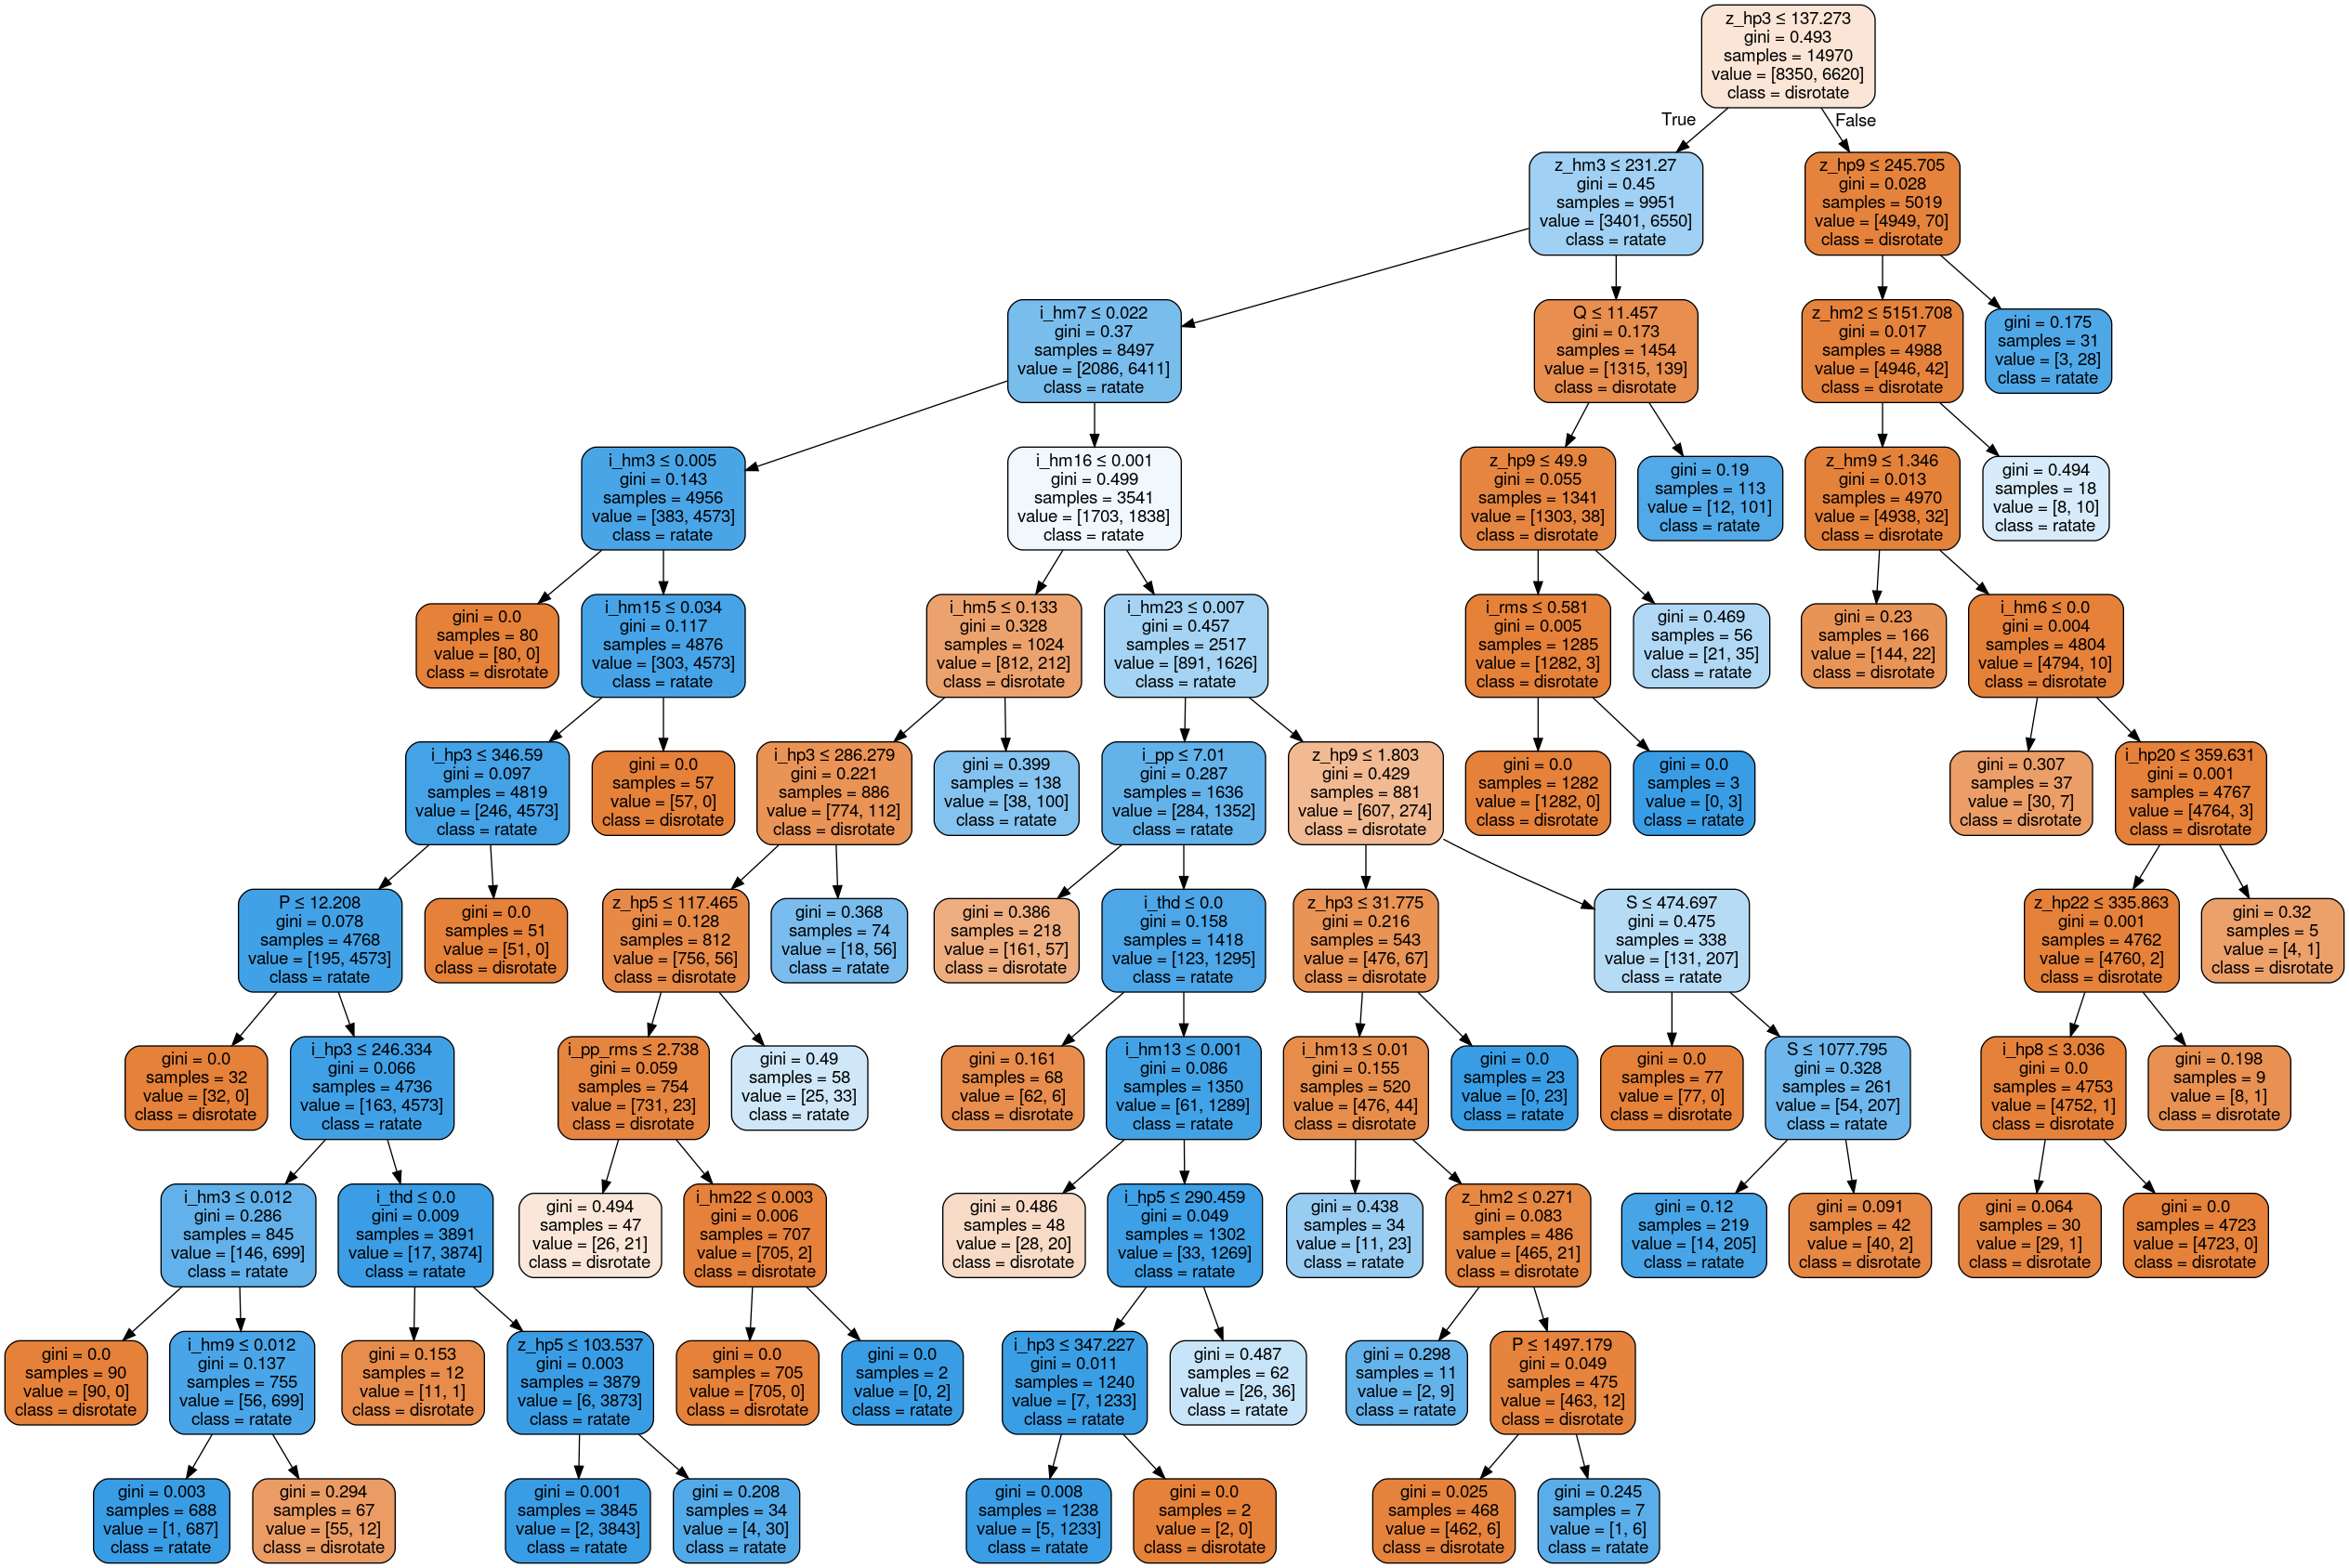

Best score on validation set:0.87003
Best parameters:{'C': 2}
Best score on test set:0.86095
0:1046
1:830


In [7]:
best_score=0.0
for md in [1,2,3,4,5,6,7,8,9,10]:
    for mss in [100,150,200,250,500,1000,1500,2000]:
        rotater_tree=tree.DecisionTreeClassifier(max_depth=md,min_samples_split=mss)
        rotater_tree.fit(x_rotate_train,y_rotate_train)
        score=rotater_tree.score(x_rotate_validation,y_rotate_validation)
        if score>best_score:
            best_score=score
            best_parameters={'max_depth':md,'min_samples_split':mss}

rotater_tree=tree.DecisionTreeClassifier(**best_parameters)
rotater_tree.fit(x_rotate_trainval,y_rotate_trainval)
test_score=rotater_tree.score(x_rotate_test,y_rotate_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

feature_name = get_feature_name()
del feature_name[0]

dot_data = tree.export_graphviz(rotater_tree,
                                feature_names=feature_name,
                                class_names=['disrotate','ratate'],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))


best_score=0.0
for c in [0.001,0.01,0.1,0.51,2,5,10,15,25,50,100,150,200,300,350,400,450,500,1000,10000]:
    rotater_svm=svm.SVC(C=c)
    rotater_svm.fit(x_rotate_train,y_rotate_train)
    score=rotater_svm.score(x_rotate_validation,y_rotate_validation)
    if score>best_score:
        best_score=score
        best_parameters={'C':c}

rotater_svm=svm.SVC(**best_parameters)
rotater_svm.fit(x_rotate_trainval,y_rotate_trainval)
test_score=rotater_svm.score(x_rotate_test,y_rotate_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

ri=read_index('is_rotate',header='extra label')
for key in ri:
    print('{}:{}'.format(key,len(ri[key])))

In [8]:
start_reading_time=time.time()

heater_transformer = {'0': 0, '1': 1}
x_heat_train, y_heat_train = read_processed_data('is_heat',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=heater_transformer,
                           source='submetered_process/training')
x_heat_train=x_heat_train[:,1:] 
x_heat_validation, y_heat_validation = read_processed_data('is_heat',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=heater_transformer,
                           source='submetered_process/validation')
x_heat_validation=x_heat_validation[:,1:]
x_heat_trainval=np.concatenate((x_heat_train,x_heat_validation),axis=0)
y_heat_trainval=np.concatenate((y_heat_train,y_heat_validation),axis=0) 
x_heat_test, y_heat_test = read_processed_data('is_heat',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=heater_transformer,
                           source='submetered_process/testing')
x_heat_test=x_heat_test[:,1:] 

print('finished loading data, cost %.3fs'%(time.time()-start_reading_time))




finished loading data, cost 19.725s


Best score on validation set:0.86124
Best parameters:{'max_depth': 7, 'min_samples_split': 200}
Best score on test set:0.85198


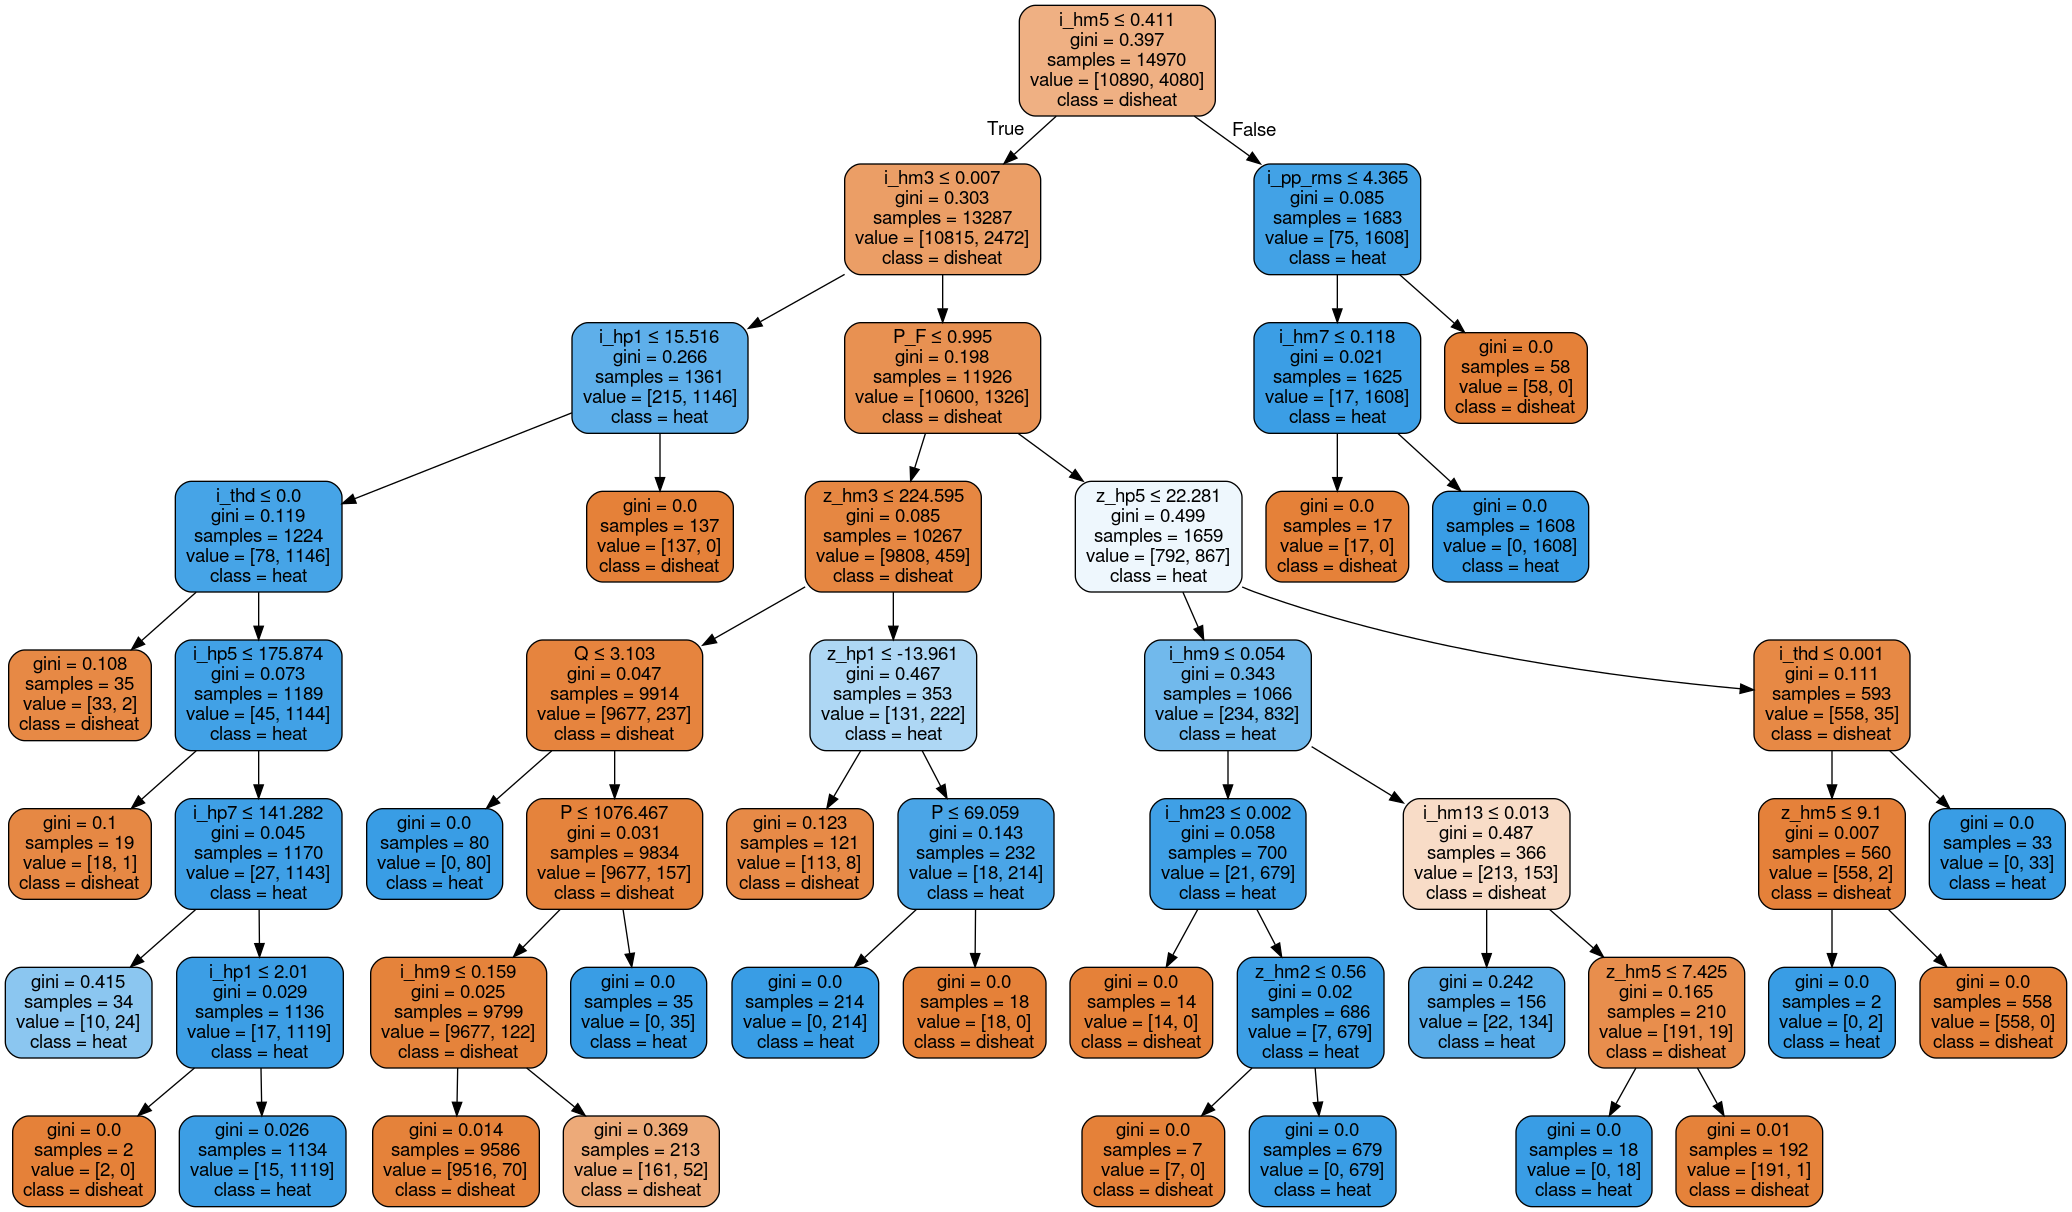

Best score on validation set:0.88632
Best parameters:{'C': 25}
Best score on test set:0.86913
0:1344
1:532


In [9]:
best_score=0.0
for md in [1,2,3,4,5,6,7,8,9,10]:
    for mss in [100,150,200,250,500,1000,1500,2000]:
        heater_tree=tree.DecisionTreeClassifier(max_depth=md,min_samples_split=mss)
        heater_tree.fit(x_heat_train,y_heat_train)
        score=heater_tree.score(x_heat_validation,y_heat_validation)
        if score>best_score:
            best_score=score
            best_parameters={'max_depth':md,'min_samples_split':mss}

heater_tree=tree.DecisionTreeClassifier(**best_parameters)
heater_tree.fit(x_heat_trainval,y_heat_trainval)
test_score=heater_tree.score(x_heat_test,y_heat_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

feature_name = get_feature_name()
del feature_name[0]

dot_data = tree.export_graphviz(heater_tree,
                                feature_names=feature_name,
                                class_names=['disheat','heat'],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))


best_score=0.0
for c in [0.001,0.01,0.1,0.51,2,5,10,15,25,50,100,150,200,300,350,400,450,500,1000,10000]:
    heater_svm=svm.SVC(C=c)
    heater_svm.fit(x_heat_train,y_heat_train)
    score=heater_svm.score(x_heat_validation,y_heat_validation)
    if score>best_score:
        best_score=score
        best_parameters={'C':c}

heater_svm=svm.SVC(**best_parameters)
heater_svm.fit(x_heat_trainval,y_heat_trainval)
test_score=heater_svm.score(x_heat_test,y_heat_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

ri=read_index('is_heat',header='extra label')
for key in ri:
    print('{}:{}'.format(key,len(ri[key])))

In [10]:
start_reading_time=time.time()

cooler_transformer = {'0': 0, '1': 1}
x_cool_train, y_cool_train = read_processed_data('is_cool',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=cooler_transformer,
                           source='submetered_process/training')
x_cool_train=x_cool_train[:,1:] 
x_cool_validation, y_cool_validation = read_processed_data('is_cool',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=cooler_transformer,
                           source='submetered_process/validation')
x_cool_validation=x_cool_validation[:,1:]
x_cool_trainval=np.concatenate((x_cool_train,x_cool_validation),axis=0)
y_cool_trainval=np.concatenate((y_cool_train,y_cool_validation),axis=0) 
x_cool_test, y_cool_test = read_processed_data('is_cool',
                           type_header='extra label',
                           direaction=1,
                           offset=0,
                           each_lenth=10,
                           Transformer=cooler_transformer,
                           source='submetered_process/testing')
x_cool_test=x_cool_test[:,1:] 

print('finished loading data, cost %.3fs'%(time.time()-start_reading_time))

finished loading data, cost 19.866s


Best score on validation set:0.89511
Best parameters:{'max_depth': 4, 'min_samples_split': 100}
Best score on test set:0.91926


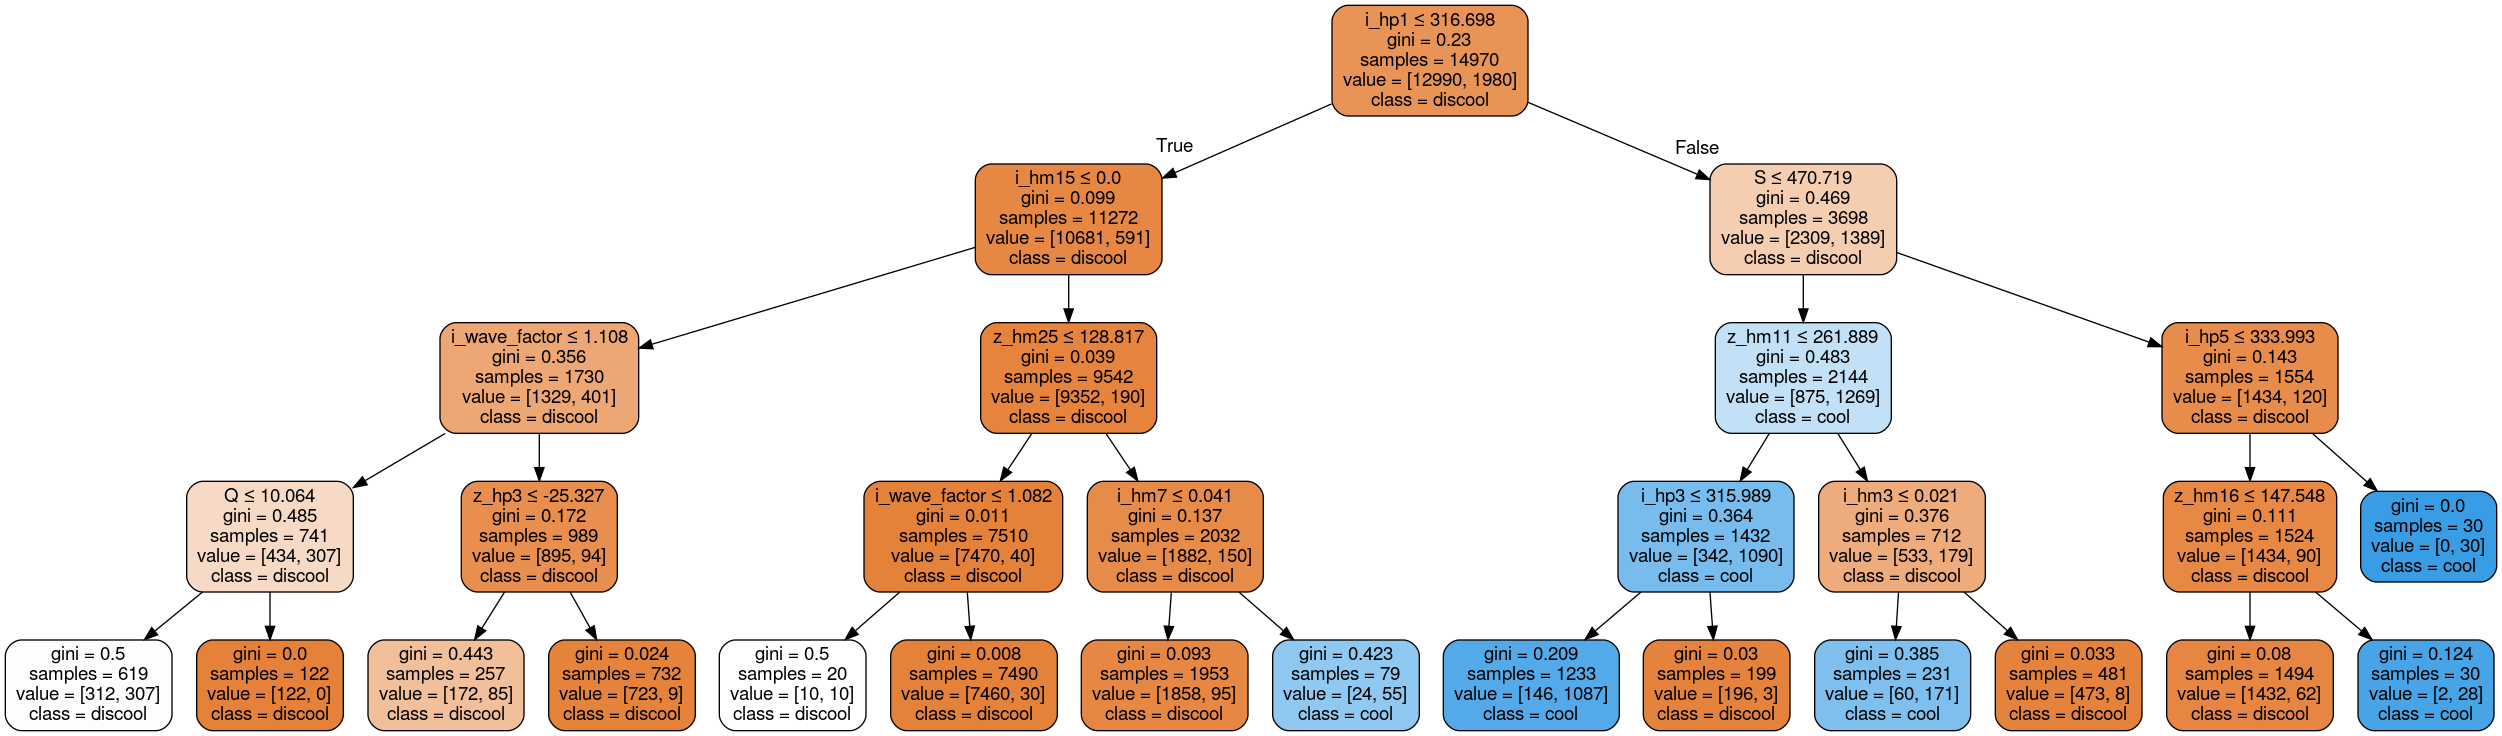

Best score on validation set:0.88469
Best parameters:{'C': 0.51}
Best score on test set:0.89050
0:1632
1:244


In [12]:
best_score=0.0
for md in [1,2,3,4,5,6,7,8,9,10]:
    for mss in [100,150,200,250,500,1000,1500,2000]:
        cooler_tree=tree.DecisionTreeClassifier(max_depth=md,min_samples_split=mss)
        cooler_tree.fit(x_cool_train,y_cool_train)
        score=cooler_tree.score(x_cool_validation,y_cool_validation)
        if score>best_score:
            best_score=score
            best_parameters={'max_depth':md,'min_samples_split':mss}

cooler_tree=tree.DecisionTreeClassifier(**best_parameters)
cooler_tree.fit(x_cool_trainval,y_cool_trainval)
test_score=cooler_tree.score(x_cool_test,y_cool_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

feature_name = get_feature_name()
del feature_name[0]

dot_data = tree.export_graphviz(cooler_tree,
                                feature_names=feature_name,
                                class_names=['discool','cool'],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))


best_score=0.0
for c in [0.001,0.01,0.1,0.51,2,5,10,15,25,50,100,150,200,300,350,400,450,500,1000,10000]:
    cooler_svm=svm.SVC(C=c)
    cooler_svm.fit(x_cool_train,y_cool_train)
    score=cooler_svm.score(x_cool_validation,y_cool_validation)
    if score>best_score:
        best_score=score
        best_parameters={'C':c}

cooler_svm=svm.SVC(**best_parameters)
cooler_svm.fit(x_cool_trainval,y_cool_trainval)
test_score=cooler_svm.score(x_cool_test,y_cool_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

ri=read_index('is_cool',header='extra label')
for key in ri:
    print('{}:{}'.format(key,len(ri[key])))

In [13]:
load_clf=svm.SVC(C=15)
load_clf.fit(x_load_trainval,y_load_trainval)
light_clf=svm.SVC(C=15)
light_clf.fit(x_light_trainval,y_light_trainval)
rotate_clf=svm.SVC(C=2)
rotate_clf.fit(x_rotate_trainval,y_rotate_trainval)
heat_clf=svm.SVC(C=25)
heat_clf.fit(x_heat_trainval,y_heat_trainval)
cool_clf=tree.DecisionTreeClassifier(max_depth=4,min_samples_split=100)
cool_clf.fit(x_cool_trainval,y_cool_trainval)
print('finished knowledge model training')


finished knowledge model training


In [30]:
#check

print(load_clf.score(x_load_test,y_load_test))
print(light_clf.score(x_light_test,y_light_test))
print(rotate_clf.score(x_rotate_test,y_rotate_test))
print(heat_clf.score(x_heat_test,y_heat_test))
print(cool_clf.score(x_cool_test,y_cool_test))

0.9659630606860158
0.9118733509234829
0.8609498680738786
0.8691292875989446
0.9192612137203167


In [16]:
start_time = time.time()
print('start reading data')

x_lighter_train, y_lighter_train = read_processed_data(
    'type',
    selected_label=[
        'Compact Fluorescent Lamp', 'Incandescent Light Bulb', 'Laptop'
    ],
    direaction=1,
    offset=10,
    each_lenth=10,
    source='submetered_process/training')
x_lighter_train = x_lighter_train[:, 1:]
x_lighter_validation, y_lighter_validation = read_processed_data(
    'type',
    selected_label=[
        'Compact Fluorescent Lamp', 'Incandescent Light Bulb', 'Laptop'
    ],
    direaction=1,
    offset=10,
    each_lenth=10,
    source='submetered_process/validation')
x_lighter_validation = x_lighter_validation[:, 1:]
x_lighter_trainval=np.concatenate((x_lighter_train,x_lighter_validation),axis=0)
y_lighter_trainval=np.concatenate((y_lighter_train,y_lighter_validation),axis=0) 

x_colder_train, y_colder_train = read_processed_data(
    'type',
    selected_label=['Fridge', 'Air Conditioner'],
    direaction=1,
    offset=10,
    each_lenth=10,
    source='submetered_process/training')
x_colder_train = x_colder_train[:, 1:]
x_colder_validation, y_colder_validation = read_processed_data(
    'type',
    selected_label=['Fridge', 'Air Conditioner'],
    direaction=1,
    offset=10,
    each_lenth=10,
    source='submetered_process/validation')
x_colder_validation = x_colder_validation[:, 1:]
x_colder_trainval=np.concatenate((x_colder_train,x_colder_validation),axis=0)
y_colder_trainval=np.concatenate((y_colder_train,y_colder_validation),axis=0) 

x_dislight_R_train, y_dislight_R_train = read_processed_data(
    'type',
    selected_label=['Hairdryer', 'Heater', 'Coffee maker', 'Water kettle'],
    direaction=1,
    offset=10,
    each_lenth=10,
    source='submetered_process/training')
x_dislight_R_train = x_dislight_R_train[:, 1:]
x_dislight_R_validation, y_dislight_R_validation = read_processed_data(
    'type',
    selected_label=['Hairdryer', 'Heater', 'Coffee maker', 'Water kettle'],
    direaction=1,
    offset=10,
    each_lenth=10,
    source='submetered_process/validation')
x_dislight_R_validation = x_dislight_R_validation[:, 1:]
x_dislight_R_trainval=np.concatenate((x_dislight_R_train,x_dislight_R_validation),axis=0)
y_dislight_R_trainval=np.concatenate((y_dislight_R_train,y_dislight_R_validation),axis=0) 

x_heat_I_train, y_heat_I_train = read_processed_data(
    'type',
    selected_label=['Microwave', 'Hair Iron', 'Soldering Iron'],
    direaction=1,
    offset=10,
    each_lenth=10,
    source='submetered_process/training')
x_heat_I_train = x_heat_I_train[:, 1:]
x_heat_I_validation, y_heat_I_validation = read_processed_data(
    'type',
    selected_label=['Microwave', 'Hair Iron', 'Soldering Iron'],
    direaction=1,
    offset=10,
    each_lenth=10,
    source='submetered_process/validation')
x_heat_I_validation = x_heat_I_validation[:, 1:]
x_heat_I_trainval=np.concatenate((x_heat_I_train,x_heat_I_validation),axis=0)
y_heat_I_trainval=np.concatenate((y_heat_I_train,y_heat_I_validation),axis=0) 

x_rotate_I_train, y_rotate_I_train = read_processed_data(
    'type',
    selected_label=[
        'Air Conditioner', 'Vacuum', 'Fan', 'Washing Machine', 'Blender'
    ],
    direaction=1,
    offset=10,
    each_lenth=10,
    source='submetered_process/training')
x_rotate_I_train = x_rotate_I_train[:, 1:]
x_rotate_I_validation, y_rotate_I_validation = read_processed_data(
    'type',
    selected_label=[
        'Air Conditioner', 'Vacuum', 'Fan', 'Washing Machine', 'Blender'
    ],
    direaction=1,
    offset=10,
    each_lenth=10,
    source='submetered_process/validation')
x_rotate_I_validation = x_rotate_I_validation[:, 1:]
x_rotate_I_trainval=np.concatenate((x_rotate_I_train,x_rotate_I_validation),axis=0)
y_rotate_I_trainval=np.concatenate((y_rotate_I_train,y_rotate_I_validation),axis=0) 

print('finished loading data, cost %2.2fs' % (time.time() - start_time))


start reading data
finished loading data, cost 73.08s


Best score on validation set:0.91856
Best parameters:{'max_depth': 6, 'min_samples_split': 150}


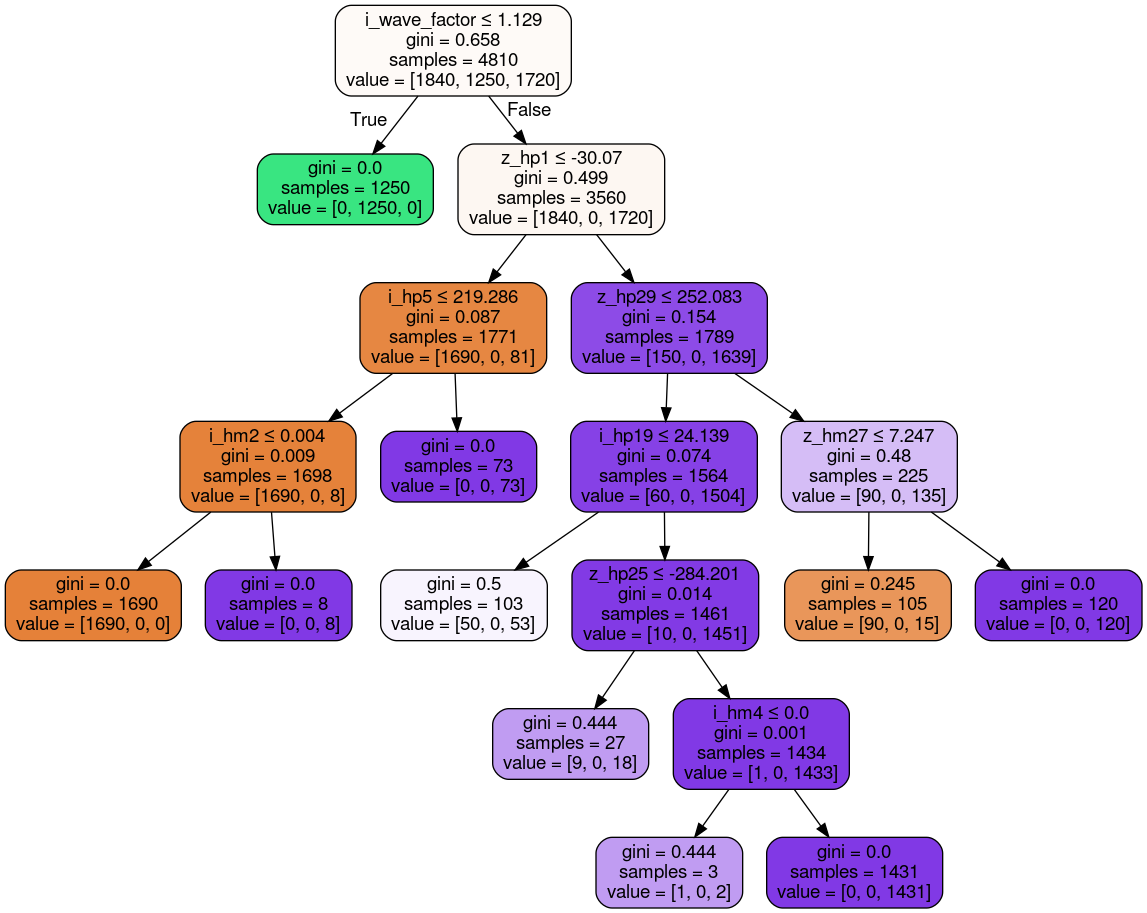

Best score on validation set:0.92165
Best parameters:{'C': 25}


In [18]:
best_score = 0.0
for md in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for mss in [100, 150, 200, 250, 500, 1000, 1500, 2000]:
        x_lighter_tree = tree.DecisionTreeClassifier(max_depth=md,
                                                     min_samples_split=mss)
        x_lighter_tree.fit(x_lighter_train, y_lighter_train)
        score = x_lighter_tree.score(x_lighter_validation,
                                     y_lighter_validation)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': md, 'min_samples_split': mss}

x_lighter_tree = tree.DecisionTreeClassifier(**best_parameters)
x_lighter_tree.fit(x_lighter_trainval, y_lighter_trainval)

print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

feature_name = get_feature_name()
del feature_name[0]

dot_data = tree.export_graphviz(
    x_lighter_tree,
    feature_names=feature_name,
    # class_names=['discool','cool'],
    filled=True,
    rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

best_score = 0.0
for c in [
        0.001, 0.01, 0.1, 0.51, 2, 5, 10, 15, 25, 50, 100, 150, 200, 300, 350,
        400, 450, 500, 1000, 10000
]:
    x_lighter_svm = svm.SVC(C=c)
    x_lighter_svm.fit(x_lighter_train, y_lighter_train)
    score = x_lighter_svm.score(x_lighter_validation, y_lighter_validation)
    if score > best_score:
        best_score = score
        best_parameters = {'C': c}

x_lighter_svm = svm.SVC(**best_parameters)
x_lighter_svm.fit(x_lighter_trainval, y_lighter_trainval)

print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Best score on validation set:0.88235
Best parameters:{'max_depth': 2, 'min_samples_split': 100}


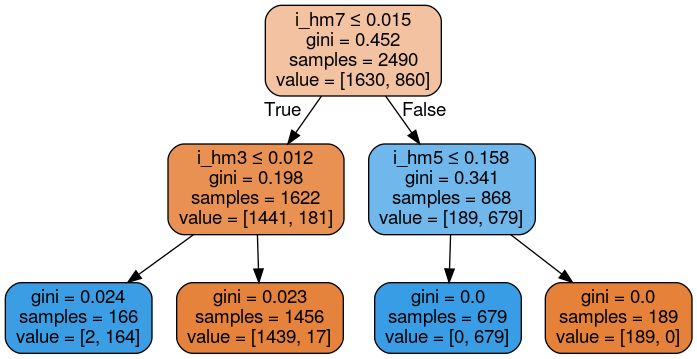

Best score on validation set:0.81961
Best parameters:{'C': 0.1}


In [19]:
best_score = 0.0
for md in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for mss in [100, 150, 200, 250, 500, 1000, 1500, 2000]:
        x_colder_tree = tree.DecisionTreeClassifier(max_depth=md,
                                                     min_samples_split=mss)
        x_colder_tree.fit(x_colder_train, y_colder_train)
        score = x_colder_tree.score(x_colder_validation,
                                     y_colder_validation)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': md, 'min_samples_split': mss}

x_colder_tree = tree.DecisionTreeClassifier(**best_parameters)
x_colder_tree.fit(x_colder_trainval, y_colder_trainval)

print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

feature_name = get_feature_name()
del feature_name[0]

dot_data = tree.export_graphviz(
    x_colder_tree,
    feature_names=feature_name,
    # class_names=['discool','cool'],
    filled=True,
    rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

best_score = 0.0
for c in [
        0.001, 0.01, 0.1, 0.51, 2, 5, 10, 15, 25, 50, 100, 150, 200, 300, 350,
        400, 450, 500, 1000, 10000
]:
    x_colder_svm = svm.SVC(C=c)
    x_colder_svm.fit(x_colder_train, y_colder_train)
    score = x_colder_svm.score(x_colder_validation, y_colder_validation)
    if score > best_score:
        best_score = score
        best_parameters = {'C': c}

x_colder_svm = svm.SVC(**best_parameters)
x_colder_svm.fit(x_colder_trainval, y_colder_trainval)

print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))


Best score on validation set:0.79828
Best parameters:{'max_depth': 9, 'min_samples_split': 100}


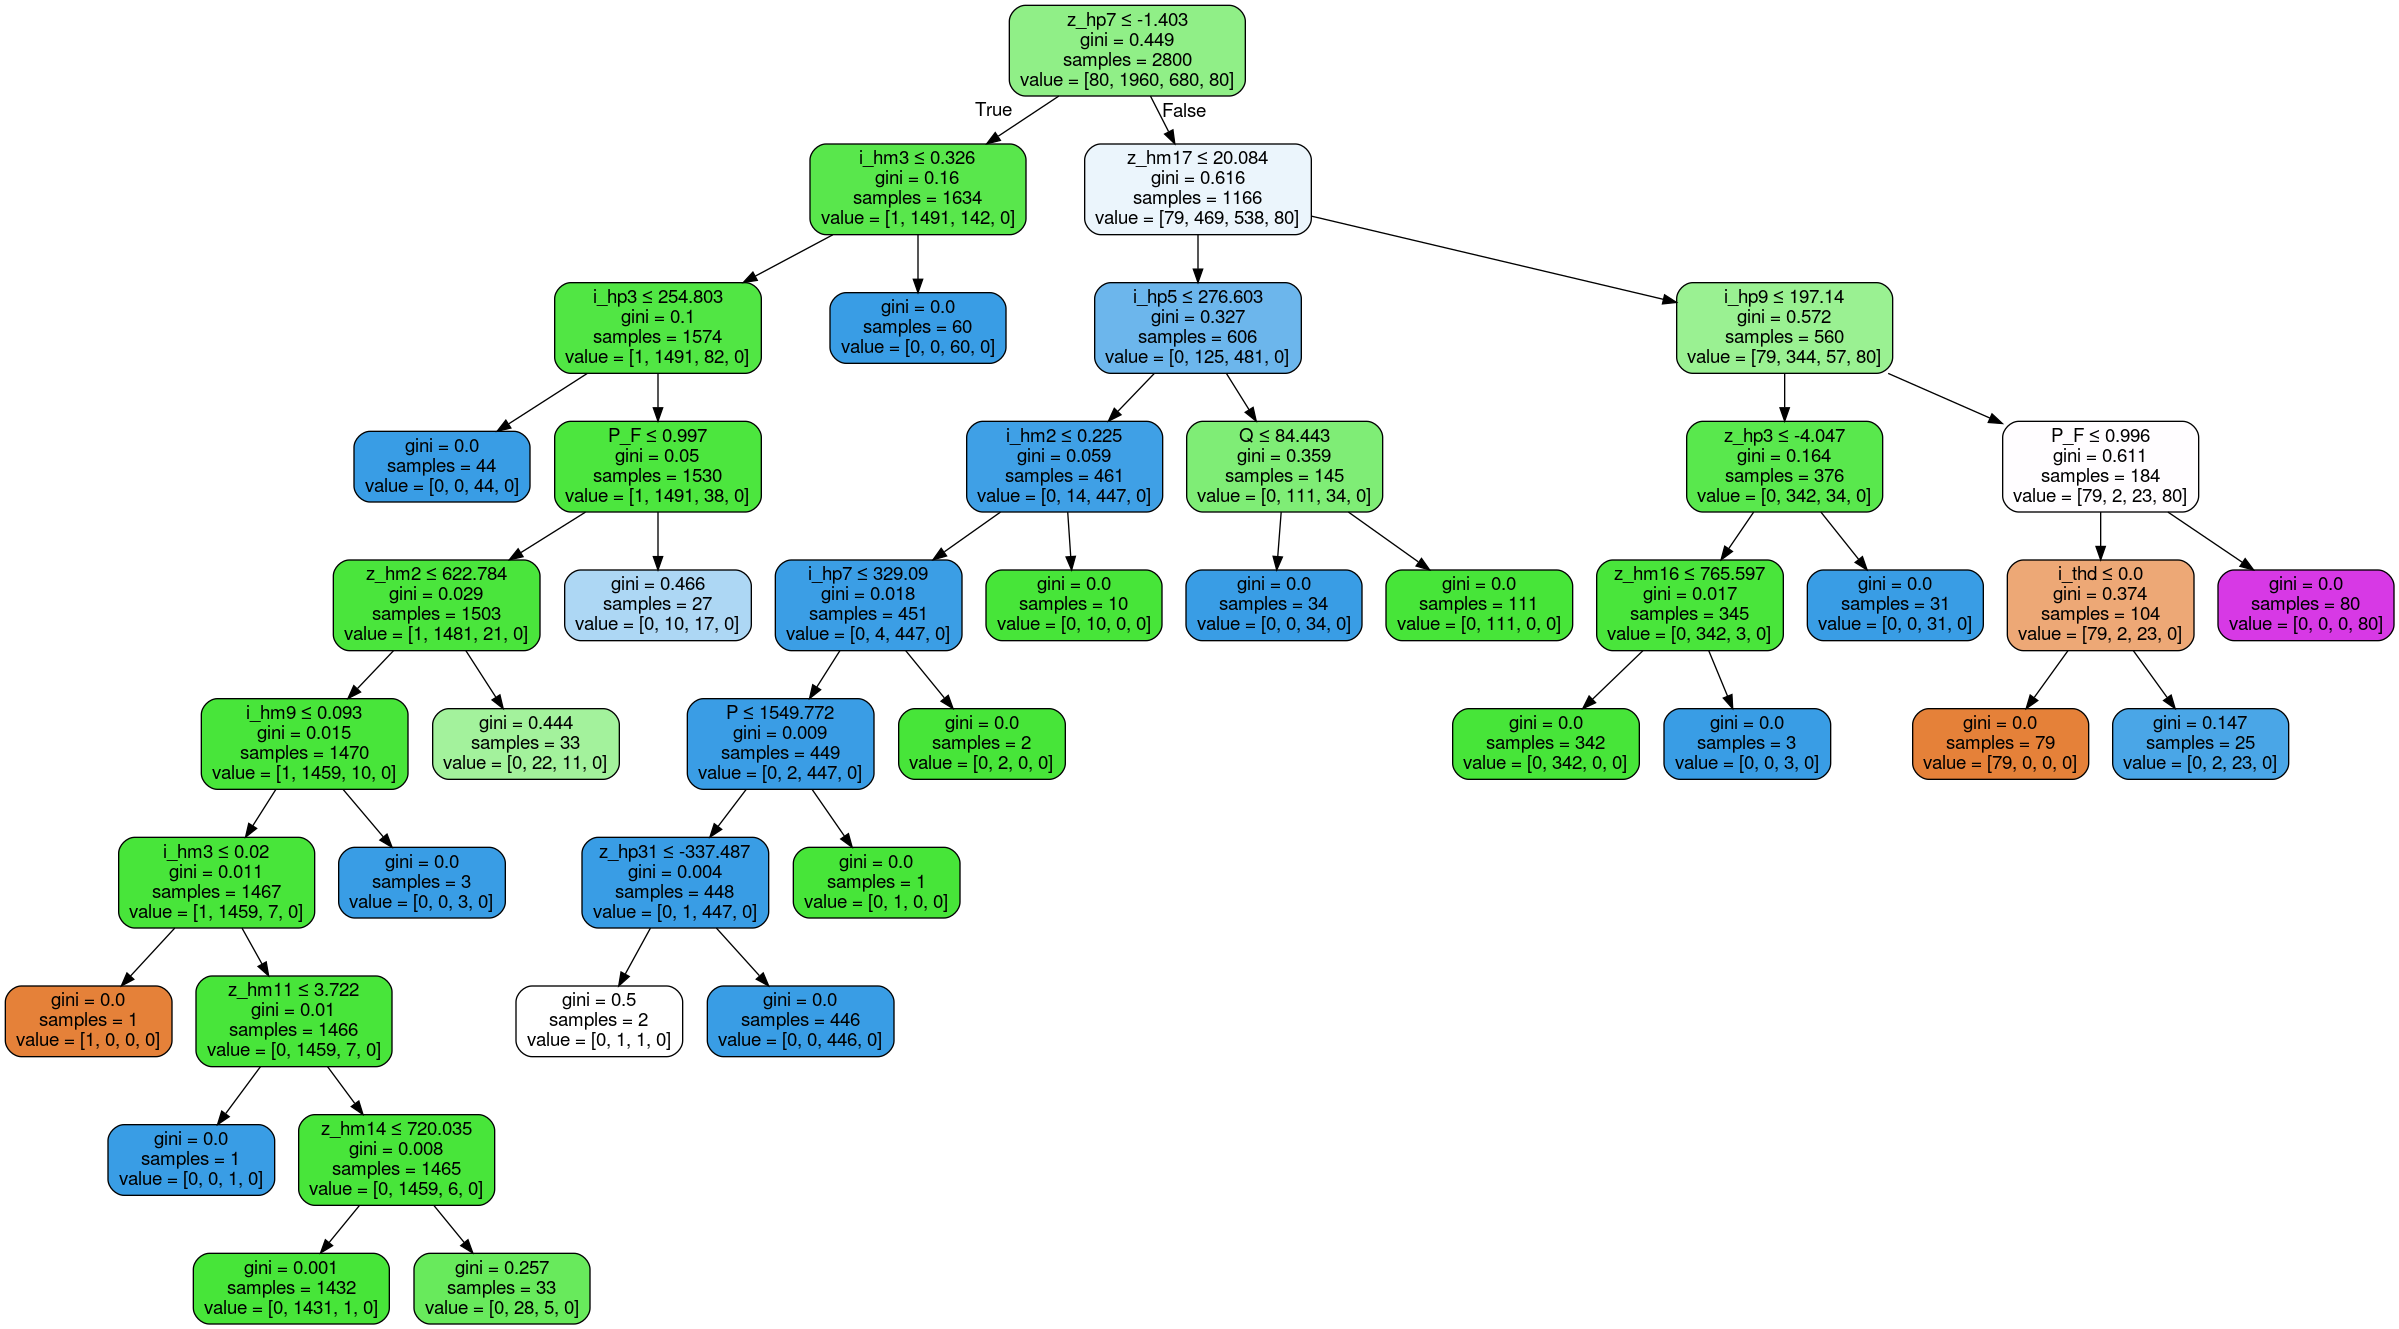

Best score on validation set:0.86379
Best parameters:{'C': 2}


In [20]:
best_score = 0.0
for md in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for mss in [100, 150, 200, 250, 500, 1000, 1500, 2000]:
        x_dislight_R_tree = tree.DecisionTreeClassifier(max_depth=md,
                                                     min_samples_split=mss)
        x_dislight_R_tree.fit(x_dislight_R_train, y_dislight_R_train)
        score = x_dislight_R_tree.score(x_dislight_R_validation,
                                     y_dislight_R_validation)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': md, 'min_samples_split': mss}

x_dislight_R_tree = tree.DecisionTreeClassifier(**best_parameters)
x_dislight_R_tree.fit(x_dislight_R_trainval, y_dislight_R_trainval)

print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

feature_name = get_feature_name()
del feature_name[0]

dot_data = tree.export_graphviz(
    x_dislight_R_tree,
    feature_names=feature_name,
    # class_names=['discool','cool'],
    filled=True,
    rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

best_score = 0.0
for c in [
        0.001, 0.01, 0.1, 0.51, 2, 5, 10, 15, 25, 50, 100, 150, 200, 300, 350,
        400, 450, 500, 1000, 10000
]:
    x_dislight_R_svm = svm.SVC(C=c)
    x_dislight_R_svm.fit(x_dislight_R_train, y_dislight_R_train)
    score = x_dislight_R_svm.score(x_dislight_R_validation, y_dislight_R_validation)
    if score > best_score:
        best_score = score
        best_parameters = {'C': c}

x_dislight_R_svm = svm.SVC(**best_parameters)
x_dislight_R_svm.fit(x_dislight_R_trainval, y_dislight_R_trainval)

print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Best score on validation set:0.94737
Best parameters:{'max_depth': 2, 'min_samples_split': 100}


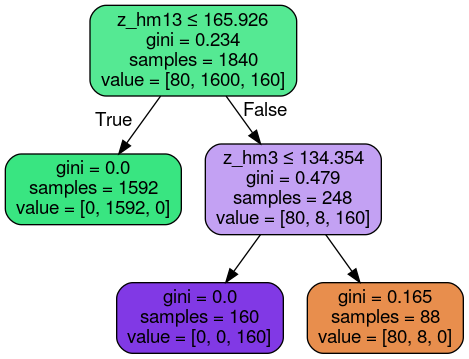

Best score on validation set:0.94737
Best parameters:{'C': 0.51}


In [21]:
best_score = 0.0
for md in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for mss in [100, 150, 200, 250, 500, 1000, 1500, 2000]:
        x_heat_I_tree = tree.DecisionTreeClassifier(max_depth=md,
                                                     min_samples_split=mss)
        x_heat_I_tree.fit(x_heat_I_train, y_heat_I_train)
        score = x_heat_I_tree.score(x_heat_I_validation,
                                     y_heat_I_validation)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': md, 'min_samples_split': mss}

x_heat_I_tree = tree.DecisionTreeClassifier(**best_parameters)
x_heat_I_tree.fit(x_heat_I_trainval, y_heat_I_trainval)

print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

feature_name = get_feature_name()
del feature_name[0]

dot_data = tree.export_graphviz(
    x_heat_I_tree,
    feature_names=feature_name,
    # class_names=['discool','cool'],
    filled=True,
    rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

best_score = 0.0
for c in [
        0.001, 0.01, 0.1, 0.51, 2, 5, 10, 15, 25, 50, 100, 150, 200, 300, 350,
        400, 450, 500, 1000, 10000
]:
    x_heat_I_svm = svm.SVC(C=c)
    x_heat_I_svm.fit(x_heat_I_train, y_heat_I_train)
    score = x_heat_I_svm.score(x_heat_I_validation, y_heat_I_validation)
    if score > best_score:
        best_score = score
        best_parameters = {'C': c}

x_heat_I_svm = svm.SVC(**best_parameters)
x_heat_I_svm.fit(x_heat_I_trainval, y_heat_I_trainval)

print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Best score on validation set:0.70729
Best parameters:{'max_depth': 10, 'min_samples_split': 200}


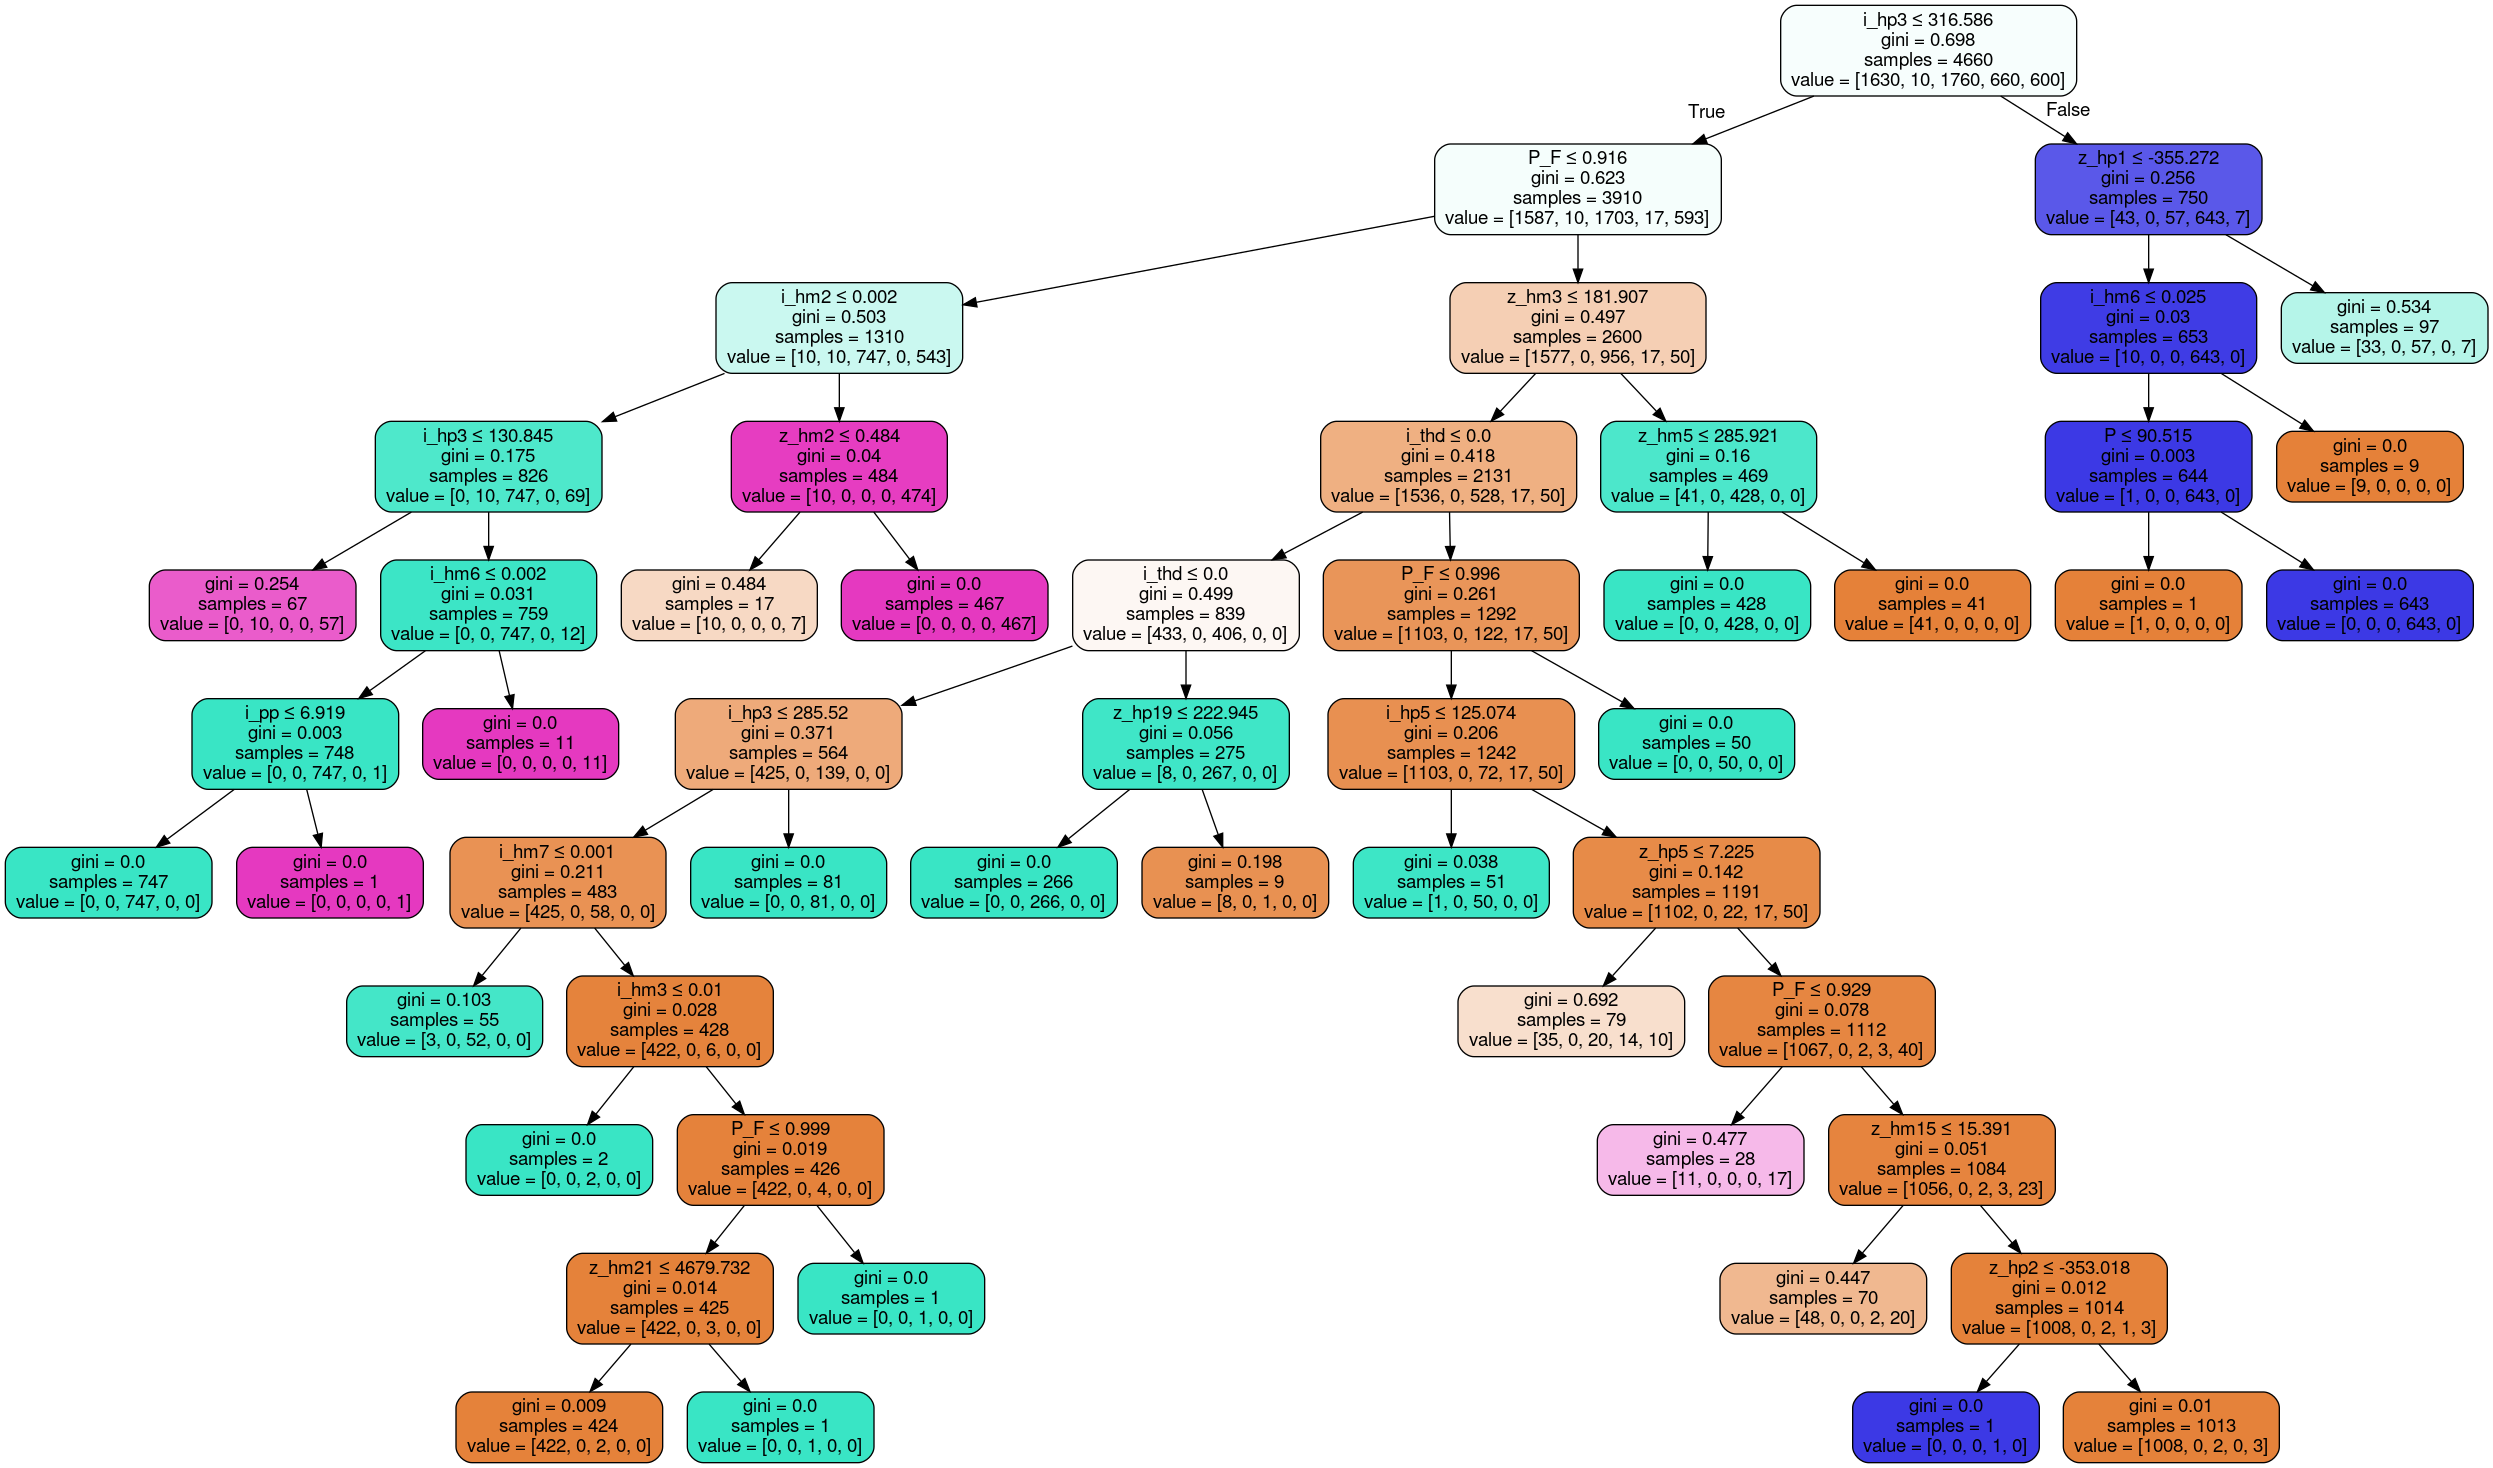

Best score on validation set:0.74167
Best parameters:{'C': 300}


In [22]:
best_score = 0.0
for md in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for mss in [100, 150, 200, 250, 500, 1000, 1500, 2000]:
        x_rotate_I_tree = tree.DecisionTreeClassifier(max_depth=md,
                                                     min_samples_split=mss)
        x_rotate_I_tree.fit(x_rotate_I_train, y_rotate_I_train)
        score = x_rotate_I_tree.score(x_rotate_I_validation,
                                     y_rotate_I_validation)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': md, 'min_samples_split': mss}

x_rotate_I_tree = tree.DecisionTreeClassifier(**best_parameters)
x_rotate_I_tree.fit(x_rotate_I_trainval, y_rotate_I_trainval)

print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

feature_name = get_feature_name()
del feature_name[0]

dot_data = tree.export_graphviz(
    x_rotate_I_tree,
    feature_names=feature_name,
    # class_names=['discool','cool'],
    filled=True,
    rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

best_score = 0.0
for c in [
        0.001, 0.01, 0.1, 0.51, 2, 5, 10, 15, 25, 50, 100, 150, 200, 300, 350,
        400, 450, 500, 1000, 10000
]:
    x_rotate_I_svm = svm.SVC(C=c)
    x_rotate_I_svm.fit(x_rotate_I_train, y_rotate_I_train)
    score = x_rotate_I_svm.score(x_rotate_I_validation, y_rotate_I_validation)
    if score > best_score:
        best_score = score
        best_parameters = {'C': c}

x_rotate_I_svm = svm.SVC(**best_parameters)
x_rotate_I_svm.fit(x_rotate_I_trainval, y_rotate_I_trainval)

print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))


In [24]:
lighter_clf=svm.SVC(C=25)
lighter_clf.fit(x_lighter_trainval,y_lighter_trainval)

colder_clf=tree.DecisionTreeClassifier(max_depth=2,min_samples_split=100)
colder_clf.fit(x_colder_trainval,y_colder_trainval)

dislight_R_clf=svm.SVC(C=2)
dislight_R_clf.fit(x_dislight_R_trainval,y_dislight_R_trainval)

heat_I_clf=tree.DecisionTreeClassifier(max_depth=2,min_samples_split=100)
heat_I_clf.fit(x_heat_I_trainval,y_heat_I_trainval)

rotate_I_clf=svm.SVC(C=300)
rotate_I_clf.fit(x_rotate_I_trainval,y_rotate_I_trainval)
print('finished type-classifier training')

finished type-classifier training


In [32]:
#check
print(lighter_clf.score(x_lighter_validation,y_lighter_validation))
print(colder_clf.score(x_colder_validation,y_colder_validation))
print(dislight_R_clf.score(x_dislight_R_validation,y_dislight_R_validation))
print(heat_I_clf.score(x_heat_I_validation,y_heat_I_validation))
print(rotate_I_clf.score(x_rotate_I_validation,y_rotate_I_validation))


print(lighter_clf.score(x_lighter_train,y_lighter_train))
print(colder_clf.score(x_colder_train,y_colder_train))
print(dislight_R_clf.score(x_dislight_R_train,y_dislight_R_train))
print(heat_I_clf.score(x_heat_I_train,y_heat_I_train))
print(rotate_I_clf.score(x_rotate_I_train,y_rotate_I_train))

1.0
0.996078431372549
1.0
0.9789473684210527
1.0
0.9986979166666666
0.9914141414141414
0.9990990990990991
1.0
1.0


In [29]:
x_test, y_test = read_processed_data('type',
                           direaction=1,
                           offset=10,
                           each_lenth=10,
                           source='submetered_process/testing')
x_test=x_test[:,1:]

def classify_model(inputs):
    outputs = []
    tree_outputs = []
    for x in inputs:
        y = []
        j = []
        x = x.reshape(1, -1)
        light_clf_result = light_clf.predict(x)
        cool_clf_result = cool_clf.predict(x)
        heat_clf_result = heat_clf.predict(x)
        rotate_clf_result = rotate_clf.predict(x)
        load_clf_result = load_clf.predict(x)

        if light_clf_result[0] == 1:
            y.append(lighter_clf.predict(x))
            j.append([
                'Compact Fluorescent Lamp', 'Incandescent Light Bulb', 'Laptop'
            ])
        if cool_clf_result[0] == 1:
            y.append(colder_clf.predict(x))
            j.append(['Fridge', 'Air Conditioner'])
        if light_clf_result[0] == 0 and load_clf_result[0] == 1:
            y.append(dislight_R_clf.predict(x))
            j.append(['Hairdryer', 'Heater', 'Coffee maker', 'Water kettle'])
        if heat_clf_result[0] == 1 and load_clf_result[0] == 0:
            y.append(heat_I_clf.predict(x))
            j.append(['Microwave', 'Hair Iron', 'Soldering Iron'])
        if rotate_clf_result[0] == 1 and load_clf_result[0] == 0:
            y.append(rotate_I_clf.predict(x))
            j.append([
                'Air Conditioner', 'Vacuum', 'Fan', 'Washing Machine',
                'Blender'
            ])
        if y == []:
            outputs.append('')
            tree_outputs.append([''])
            continue
        outputs.append(max(y, key=y.count))
        tree_outputs.append(sum(j, []))
    return outputs, tree_outputs


y_predict, tree_predict = classify_model(x_test)
count0 = 0
count1 = 0

for i in range(len(y_predict)):
    if y_test[i] in tree_predict[i]:
        count0 += 1
    if y_predict[i] == y_test[i]:
        count1 += 1
print('tree_classification\'s accuracy: %.6f'%(count0 / len(y_predict)))
print('type_classification\'s accuracy: %.6f'%(count1 / len(y_predict)))

tree_classification's accuracy: 0.845646
type_classification's accuracy: 0.640106


In [4]:
#compare
x_train, y_train = read_processed_data('type',
                           direaction=1,
                           offset=10,
                           each_lenth=10,
                           source='submetered_process/training')
x_train=x_train[:,1:]

x_validation, y_validation = read_processed_data('type',
                           direaction=1,
                           offset=10,
                           each_lenth=10,
                           source='submetered_process/validation')
x_validation=x_validation[:,1:]
x_trainval=np.concatenate((x_train,x_validation),axis=0)
y_trainval=np.concatenate((y_train,y_validation),axis=0) 

x_test, y_test = read_processed_data('type',
                           direaction=1,
                           offset=10,
                           each_lenth=10,
                           source='submetered_process/testing')
x_test=x_test[:,1:]



In [6]:
best_score=0.0
for md in [1,2,3,4,5,6,7,8,9,10]:
    for mss in [100,150,200,250,500,1000,1500,2000]:
        compare_tree=tree.DecisionTreeClassifier(max_depth=md,min_samples_split=mss)
        compare_tree.fit(x_train,y_train)
        score=compare_tree.score(x_validation,y_validation)
        if score>best_score:
            best_score=score
            best_parameters={'max_depth':md,'min_samples_split':mss}

compare_tree=tree.DecisionTreeClassifier(**best_parameters)
compare_tree.fit(x_trainval,y_trainval)
test_score=compare_tree.score(x_test,y_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

# feature_name = get_feature_name()
# del feature_name[0]

# dot_data = tree.export_graphviz(compare_tree,
#                                 feature_names=feature_name,
#                                 class_names=['discool','cool'],
#                                 filled=True,
#                                 rounded=True,
#                                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# display(Image(graph.create_png()))


best_score=0.0
for c in [0.001,0.01,0.1,0.51,2,5,10,15,25,50,100,150,200,300,350,400,450,500,1000,10000]:
    compare_svm=svm.SVC(C=c)
    compare_svm.fit(x_train,y_train)
    score=compare_svm.score(x_validation,y_validation)
    if score>best_score:
        best_score=score
        best_parameters={'C':c}

compare_svm=svm.SVC(**best_parameters)
compare_svm.fit(x_trainval,y_trainval)
test_score=compare_svm.score(x_test,y_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

Best score on validation set:0.65049
Best parameters:{'max_depth': 10, 'min_samples_split': 100}
Best score on test set:0.66992
Best score on validation set:0.71922
Best parameters:{'C': 25}
Best score on test set:0.69736
